In [1]:
%matplotlib inline

In [2]:
import sys
import numpy
import h5py

/usr/lib64/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)


In [3]:
from wpg import Wavefront
import wpg.wpg_uti_wf as utils

#import SRW core functions
from wpg.srwlib import srwl

## Load wavefront from file 

In [4]:
wf = Wavefront()

In [5]:
wf.load_hdf5('/data/netapp/s2e/simex/Tests/python/unittest/TestFiles/prop_out/prop_out_0000011.h5')

## Get photon energy 

In [6]:
wf.params.photonEnergy

4960.0

## Get low level info

In [7]:
wf.srw_info()

'Rx = 5.161661356734015e-05\nRy = 2.0624490665976936e-05\narElecPropMatr = array of size 20\narEx = [-13858.021   -5639.0723 -10755.078  ... -36064.777   30344.219\n -42246.773 ]\narEy = [ 2.0221289e-05 -5.5289302e-06  1.7463717e-05 ...  1.9328694e-05\n  1.6909915e-05  1.5769281e-05]\narMomX = array of size 6050\narMomY = array of size 6050\narWfrAuxData = array of size 30\navgPhotEn = 4960.0\ndRx = 1.2834925561703358e-06\ndRy = 5.128526954374414e-07\nmesh = Radiation Mesh (Sampling)\n\tarSurf = None\n\teFin = 4.5666758277358874e-15\n\teStart = -4.5833425278371126e-15\n\thvx = 1\n\thvy = 0\n\thvz = 0\n\tne = 550\n\tnvx = 0\n\tnvy = 0\n\tnvz = 1\n\tnx = 78\n\tny = 78\n\txFin = 5.053243313801807e-07\n\txStart = -4.915937565962465e-07\n\tyFin = 3.1942160675782327e-07\n\tyStart = -3.1074234477331977e-07\n\tzStart = 932.996130760986\n\nnumTypeElFld = f\npartBeam = Particle Beam\n\tIavg = 0\n\tarStatMom2 = array of size 21\n\tnPart = 0\n\tpartStatMom1 = Charged Particle\n\t\tgamma = 1\n\t\tn

## Plot pulse in time domain 

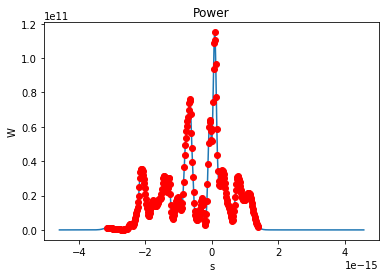

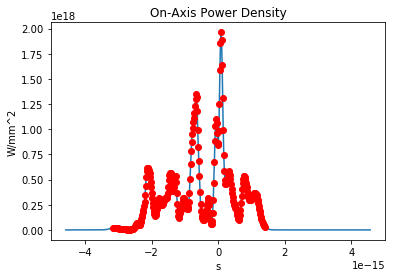

number of meaningful slices: 274
Pulse energy 9.4e-05 J


20525544171.445255

In [8]:
utils.integral_intensity(wf)

## Switch to frequency domain

In [11]:
srwl.SetRepresElecField( wf._srwl_wf, 'f')

## Plot spectrum

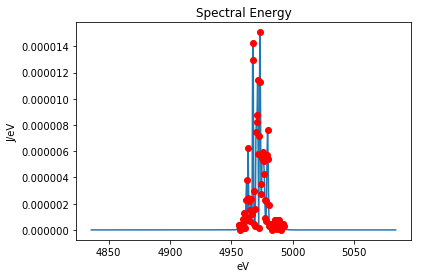

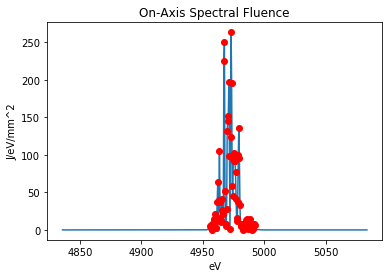

number of meaningful slices: 82


2.529981784613394e-06

In [13]:
utils.integral_intensity(wf)

###  Ok, spectrum centered at 4.96 keV

## Load same wavefront again 

In [16]:
wf.load_hdf5('/data/netapp/s2e/simex/Tests/python/unittest/TestFiles/prop_out/prop_out_0000011.h5')

In [17]:
wf.params.photonEnergy

4960.0

##  Change photon energy to 8.6 keV

In [18]:
wf.params.photonEnergy = 8.6e3

In [19]:
wf.params.photonEnergy

8600.0

In [20]:
wf.srw_info()

'Rx = 5.161661356734015e-05\nRy = 2.0624490665976936e-05\narElecPropMatr = array of size 20\narEx = [-13858.021   -5639.0723 -10755.078  ... -36064.777   30344.219\n -42246.773 ]\narEy = [ 2.0221289e-05 -5.5289302e-06  1.7463717e-05 ...  1.9328694e-05\n  1.6909915e-05  1.5769281e-05]\narMomX = array of size 6050\narMomY = array of size 6050\narWfrAuxData = array of size 30\navgPhotEn = 8600.0\ndRx = 1.2834925561703358e-06\ndRy = 5.128526954374414e-07\nmesh = Radiation Mesh (Sampling)\n\tarSurf = None\n\teFin = 4.5666758277358874e-15\n\teStart = -4.5833425278371126e-15\n\thvx = 1\n\thvy = 0\n\thvz = 0\n\tne = 550\n\tnvx = 0\n\tnvy = 0\n\tnvz = 1\n\tnx = 78\n\tny = 78\n\txFin = 5.053243313801807e-07\n\txStart = -4.915937565962465e-07\n\tyFin = 3.1942160675782327e-07\n\tyStart = -3.1074234477331977e-07\n\tzStart = 932.996130760986\n\nnumTypeElFld = f\npartBeam = Particle Beam\n\tIavg = 0\n\tarStatMom2 = array of size 21\n\tnPart = 0\n\tpartStatMom1 = Charged Particle\n\t\tgamma = 1\n\t\tn

## Plot time domain 

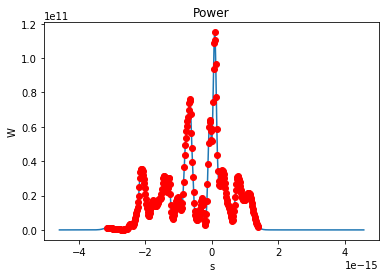

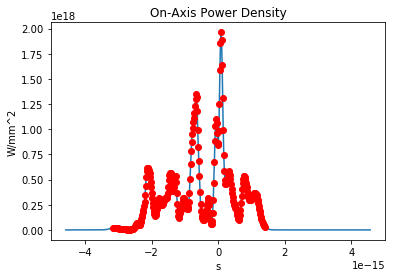

number of meaningful slices: 274
Pulse energy 9.4e-05 J


20525544171.445255

In [21]:
utils.integral_intensity(wf)

#### Pulse is identical to 4.96 keV, in reality, pulse energy should also increase correspondingly: arEhor *= sqrt(8.6/4.96); arEver *= sqrt(8.6/4.96)

## Switch to frequency domain

In [22]:
srwl.SetRepresElecField( wf._srwl_wf, 'f')

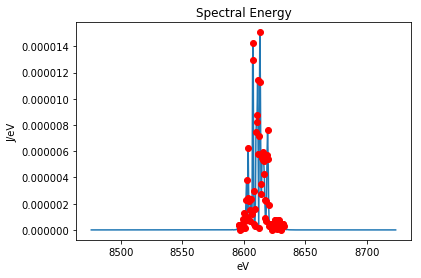

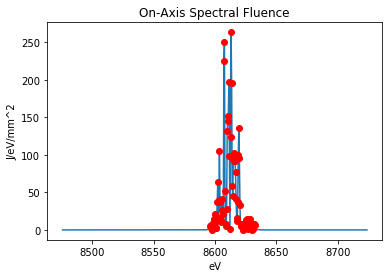

number of meaningful slices: 82


2.529981784613394e-06

In [23]:
utils.integral_intensity(wf)

#### Spectrum now near 8.6 keV.